# Analyse the trade ledger
Find the key areas of interest for trading:
- Ticker
- Time of year
- Periods held

In [1]:
#Import modules
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
#Import data
path = r'C:\\Users\\Robert\\Documents\\python_scripts\\stock_trading_ml_modelling\\historical_prices'
ledger_df = pd.read_csv(path+r'\\trades_ledger_rf_mod.csv')
ledger_df.dropna(axis=0,inplace=True)
ledger_df['buy_date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in ledger_df['buy_date']]
ledger_df['sell_date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in ledger_df['sell_date']]
print(ledger_df.shape)
print(ledger_df.dtypes)
ledger_df.head()

(72, 11)
Unnamed: 0               int64
ticker                  object
share_vol                int64
buy_spend              float64
buy_prob               float64
buy_date        datetime64[ns]
sell_spend             float64
sell_prob              float64
sell_date       datetime64[ns]
periods_held           float64
profit_loss            float64
dtype: object


,Unnamed: 0,ticker,share_vol,buy_spend,buy_prob,buy_date,sell_spend,sell_prob,sell_date,periods_held,profit_loss
0,0,AGR,2469,99997.60,0.363336,2014-01-06,-147630.5,0.372360,2015-03-30,64.0,47632.90
1,1,AGR,1735,99960.45,0.363336,2017-01-09,-101091.0,0.372464,2017-03-13,9.0,1130.55
2,2,AGR,1723,99960.01,0.349121,2018-07-23,-99537.5,0.360050,2019-01-28,27.0,-422.51
3,3,AGR,1679,99965.81,0.360538,2019-02-25,-98651.5,0.360316,2019-04-29,9.0,-1314.31
5,5,COA,3238,99980.40,0.363336,2014-01-06,-103933.0,0.372360,2014-02-03,4.0,3952.60


In [3]:
#Create a cumulative profit loss
ledger_df = ledger_df.sort_values(['buy_date','ticker']).reset_index(drop=True)
ledger_df['cum_profit_loss'] = [ledger_df.iloc[:x+1]['profit_loss'].sum() for x in ledger_df.index]

Text(0.5,0,'Buy date')

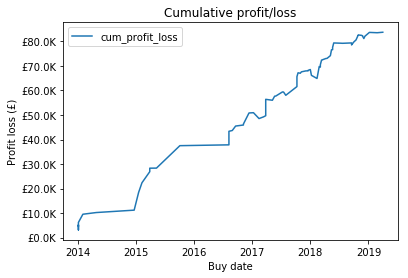

In [13]:
#Plot the cumulative profit_loss
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ledger_df.buy_date,ledger_df.cum_profit_loss/10)
ax.legend()
ax.set_title('Cumulative profit/loss')
ax.set_ylabel('Profit loss (£)')
def millions(x, pos):
    #'The two args are the value and tick position'
    return '£{:,.1f}K'.format(x*1e-3)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_xlabel('Buy date')

In [5]:
#Top line summary
print('''\nLEDGER STATS:
    FIRST TRADE VALUE:£{:,.2f}
    NET PROFIT LOSS:£{:,.2f}
        TOTAL PROFIT:£{:,.2f}
        TOTAL LOSS:£{:,.2f}
    '''.format(
    ledger_df.iloc[0].buy_spend/100
    ,ledger_df.profit_loss.sum()/100
    ,ledger_df[ledger_df.profit_loss > 0].profit_loss.sum()/100
    ,ledger_df[ledger_df.profit_loss < 0].profit_loss.sum()/100
))


LEDGER STATS:
    FIRST TRADE VALUE:£999.98
    NET PROFIT LOSS:£8,375.14
        TOTAL PROFIT:£9,654.32
        TOTAL LOSS:£-1,279.18
    


In [6]:
#Calculate ROI
ledger_df['roi'] = ledger_df['profit_loss'] / ledger_df['buy_spend']
print('''\nROI STATS:
    AVERAGE ROI %: {:.2f}
    AVERAGE POS ROI %: {:.2f}
    POS COUNT: {:,.0f}
    AVERAGE NEG ROI %: {:.2f}
    NEG COUNT: {:,.0f}
\nPERIODS HELD STATS:
    AVERAGE PERIODS HELD: {:.2f}
    AVERAGE POS ROI PERIODS HELD: {:.2f}
    AVERAGE NEG ROI PERIODS HELD: {:.2f}
    '''.format(
    ledger_df['roi'].mean()*100
    ,ledger_df[ledger_df['roi'] > 0]['roi'].mean()*100
    ,len(ledger_df[ledger_df['roi'] > 0])
    ,ledger_df[ledger_df['roi'] <= 0]['roi'].mean()*100
    ,len(ledger_df[ledger_df['roi'] <= 0])
    ,ledger_df['periods_held'].mean()
    ,ledger_df[ledger_df['roi'] > 0]['periods_held'].mean()
    ,ledger_df[ledger_df['roi'] <= 0]['periods_held'].mean()
))


ROI STATS:
    AVERAGE ROI %: 11.65
    AVERAGE POS ROI %: 18.24
    POS COUNT: 53
    AVERAGE NEG ROI %: -6.74
    NEG COUNT: 19

PERIODS HELD STATS:
    AVERAGE PERIODS HELD: 26.07
    AVERAGE POS ROI PERIODS HELD: 25.68
    AVERAGE NEG ROI PERIODS HELD: 27.16
    


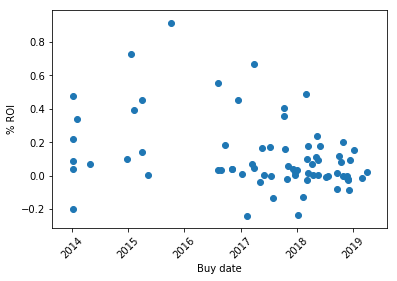

In [7]:
#ROI % by date
fig,ax = plt.subplots()

#matplotlib formatting for dates
years = mdates.YearLocator()
month = mdates.MonthLocator()
dates_fmt = mdates.DateFormatter('%Y')

#Format the x-axis
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(dates_fmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel(r'Buy date')

#Format the y-axis
ax.set_ylabel(r'% ROI')

ax.set_title = r'ROI % by buy_date'

tmp_df = ledger_df[ledger_df['roi']<10]
ax.scatter(tmp_df['buy_date'].tolist(),tmp_df['roi'])

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


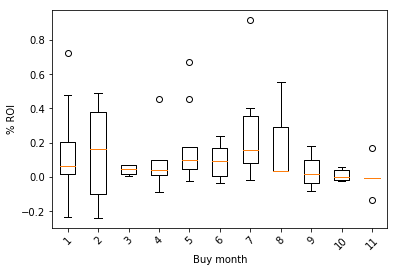

In [8]:
#ROI % by month
ledger_df['month'] = [x.month for x in ledger_df['buy_date']]
fig,ax = plt.subplots()

#Format the x-axis
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel(r'Buy month')

#Format the y-axis
ax.set_ylabel(r'% ROI')

ax.set_title = r'ROI % by buy_date'

tmp_df = ledger_df[ledger_df['roi']<10]
data = []
labels = []
for i in tmp_df['month'].unique():
    labels.append(i)
    data.append(tmp_df.loc[tmp_df['month'] == i,'roi'].tolist())
ax.boxplot(data)
fig.show()

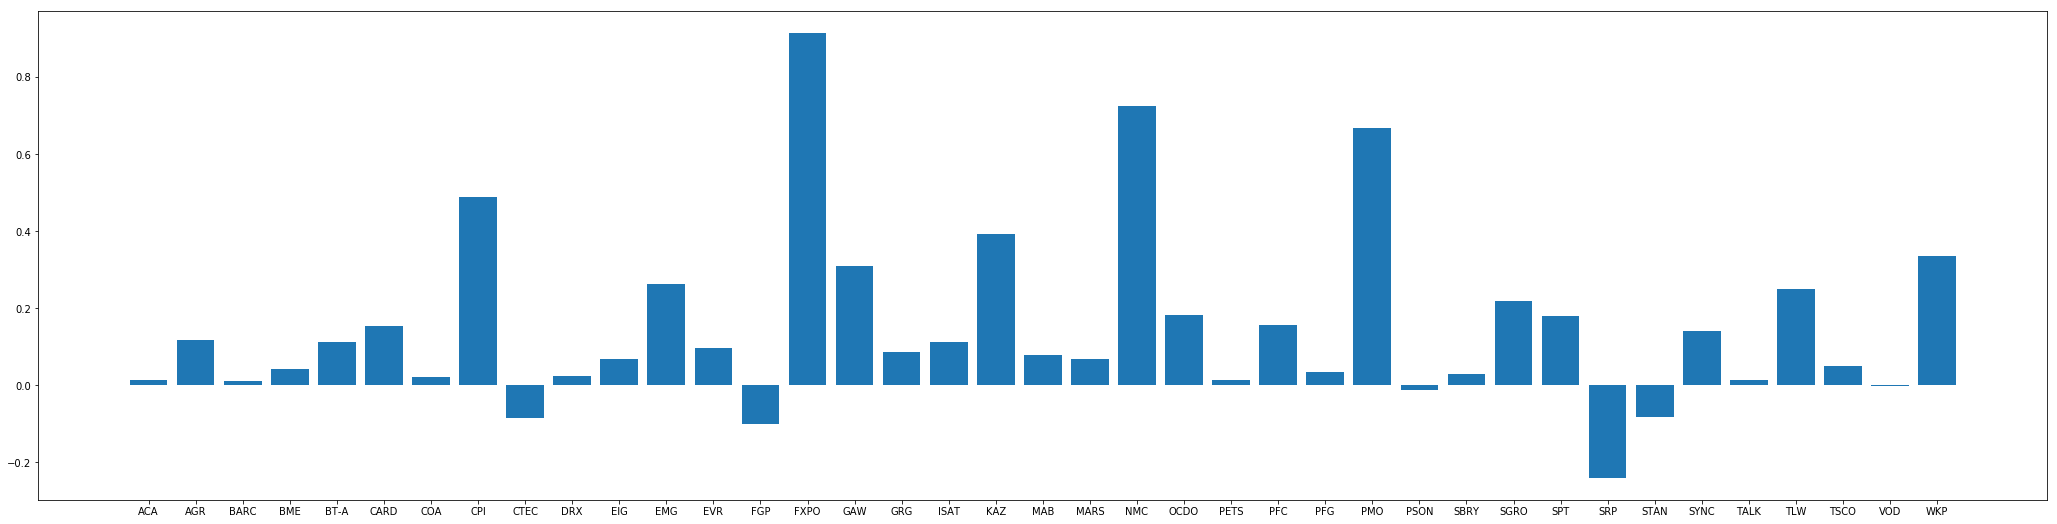

In [9]:
#ROI % by ticker

#Create a mean and median ROI for each ticker
tmp_df = ledger_df[['ticker','roi']].groupby(['ticker']).mean()
tmp_df.rename(columns={'roi':'mean'},inplace=True)
tmp_df['median'] = ledger_df[['ticker','roi']].groupby(['ticker']).median()
tmp_df.rename(columns={'roi':'median'},inplace=True)
tmp_df

fig,ax = plt.subplots(figsize=(36,9))
man_bar = ax.bar(tmp_df.index,tmp_df['mean'])
plt.show()

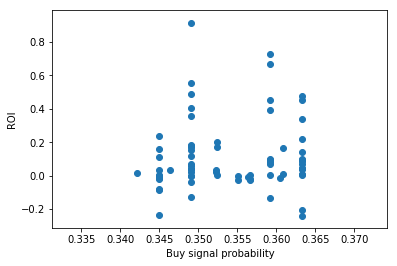

In [10]:
#ROI by signal prob 
fig,ax = plt.subplots()
tmp_df = ledger_df[ledger_df['roi']<10]
ax.scatter(tmp_df['buy_prob'],tmp_df['roi'])
ax.set_xlabel('Buy signal probability')
ax.set_ylabel('ROI')
plt.show()

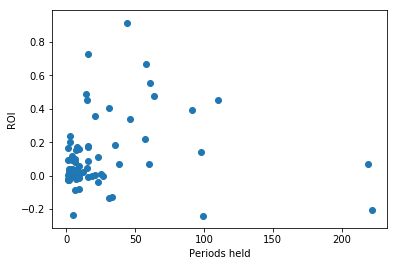

In [11]:
#ROI by periods held
fig,ax = plt.subplots()
tmp_df = ledger_df[ledger_df['roi']<10]
ax.scatter(tmp_df['periods_held'],tmp_df['roi'])
ax.set_xlabel('Periods held')
ax.set_ylabel('ROI')
plt.show()